### All imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.text import Text
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

### Reading the CSV file of the hotel reviews

In [2]:
df2 = pd.read_csv("7282_1Copy.csv") 
df2.head(5)
#df2.count()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


### Removing records with no text reviews

In [3]:
df_withoutblankreviews = df2[ df2['reviews.rating'].notnull( )]
df_allreviews = df_withoutblankreviews[df_withoutblankreviews['reviews.text'].notnull()]
#df_allreviews.count()

### Assigning reviews positive or negative flag based on ratings 

In [5]:
df_allreviews.loc[:,'Positivity'] = np.where(df_allreviews['reviews.rating'] > 3, '+ve', '-ve')
df_allreviews.head(5)

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince,Positivity
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN,+ve
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN,+ve
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN,+ve
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN,+ve
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN,+ve
5,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We loved staying on the island of Lido! You ne...,Very nice hotel,NaN,A Traveler,NaN,+ve
6,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-06-10T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Lovely view out onto the lagoon. Excellent vie...,Lovely view out onto the lagoon. Excellent view.,NaN,A Traveler,NaN,+ve
7,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-05-14T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,ottimo soggiorno e ottima sistemazione nei gio...,Lovely view out onto the lagoon. Excellent view.,NaN,A Traveler,NaN,+ve
8,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-09-14T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,3.0,Gnstiger Ausgangspunkt fr Venedig Besuche. Ruh...,G��nstige Lage,NaN,Doppeldecker,NaN,-ve
9,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-05-16T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Lidoen er perfekt til et par dages ro og afsla...,Ro og hygge,NaN,A Traveler,NaN,+ve


### User input for state

In [6]:
print ('Enter the state from the list: GA,IA,CA,TX,AZ,MT,OK,OR,AL,PA,WA,ME,MI,MO,SC,MN,MA,VA,IN,NJ,TN,AR,NY,MD,OH,FL,\
IL,SD,WY,KY,NC,NE,LA,KS,WI,HI,CT,NV,DC,ID,PR')
print ('State: ')
R1 = input('> ')

Hotelnames = [x for x in df_allreviews[df_allreviews['province'] == R1]['name']]
set(Hotelnames)

Enter the state from the list: GA,IA,CA,TX,AZ,MT,OK,OR,AL,PA,WA,ME,MI,MO,SC,MN,MA,VA,IN,NJ,TN,AR,NY,MD,OH,FL,IL,SD,WY,KY,NC,NE,LA,KS,WI,HI,CT,NV,DC,ID,PR
State: 
> VA


{'Ambassadors Inn and Suites',
 'Cambria Hotel & Suites',
 'Comfort Inn - Springfield',
 'Days Inn Ruther Glen Kings Dominion Area',
 'Hampton Inn Dublin',
 'Hampton Inn Ft Chiswell',
 'Hampton Inn Virginia Beach Oceanfront North',
 'Holiday Inn Express Hotel & Suites Emporia',
 'Holiday Inn Express Hotel and Suites Va Beach Oceanfront',
 'Hotel Marinca and Spa',
 'Hotel Vorbach',
 'Hyatt Centric Arlington',
 'Hyatt Dulles',
 'Miramar Boutique Hotel',
 'Pueblo Bonito Sunset Beach Resort & Spa - All Inclusive',
 'Quality Inn',
 'Quality Inn and Suites',
 'Southside Motel',
 'The Alexandrian, Autograph Collection',
 'The National Conference Center',
 'Travelodge Ruther Glen',
 'Wingate By Wyndham Chantilly / Dulles Airport'}

### User input for hotels

In [7]:
print ('Enter the 2 hotel names from the list above')
print('Hotel 1: ')
H1 = input('> ')
print('Hotel 2: ')
H2 = input('> ')

Enter the 2 hotel names from the list above
Hotel 1: 
> Ambassadors Inn and Suites
Hotel 2: 
> Hampton Inn Virginia Beach Oceanfront North


### Clean-up function to remove punctuation, stopwords and lemmatize the words

In [8]:
def clean_up(word_list):
    #tokenize the review
    tokens = word_tokenize(word_list)
    
    #change all to lower case
    tokens = [word.lower() for word in tokens]
  
    #remove punctuation
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    #remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    
    #lemmatization
    wnl = WordNetLemmatizer()
    stemizedtokens = [wnl.lemmatize(t) for t in tokens]
    
    return list(set(stemizedtokens))

### Check-contains function to check if defined words are present in the user review

In [9]:
def check_contains(list, wordlist):
    result = ' '
    for w in wordlist:
        if w in list:
            result = 'Y'
            break
        else:
            result = 'N'
            continue
    return result

### Review-count to get count of each attribute for positive and negative reviews

In [10]:
def review_count(df, col):
    op = df[[col,'Positivity']][df[col] == 'Y']
    op = op.groupby('Positivity').count()
    op['Keyword'] = col
    op['Value'] = op[col]
    return op.reset_index()[['Positivity','Keyword','Value']]

### Function to do text analysis on the reviews 

In [11]:
def analysis(state, hotel):
    df_H = df_allreviews[(df_allreviews['name'] == hotel) & (df_allreviews['province'] == state)]
    
    reviewtext_H = df_H[['reviews.text', 'Positivity']]
     
  #  reviewtext_H.loc[:,'Words'] = [word_tokenize(x) for x in reviewtext_H['reviews.text']]
    
    reviewtext_H.loc[:,'Words'] = [clean_up(x) for x in reviewtext_H['reviews.text']]
    
    wl1 = ['service', 'help', 'assist', 'support','friend', 'comfort']
    wl2 = ['food', 'delicacy','taste', 'dish']
    wl3 = ['clean', 'tidy', 'maintain','wipe']
    wl4 = ['price','cost','value','money']
    wl5 = ['location', 'surround', 'area','ambience']
    reviewtext_H.loc[:,'Service'] = [check_contains(x,wl1) for x in reviewtext_H['Words']]
    reviewtext_H.loc[:,'Food'] = [check_contains(x,wl2) for x in reviewtext_H['Words']]
    reviewtext_H.loc[:,'Cleanliness'] = [check_contains(x,wl3) for x in reviewtext_H['Words']]
    reviewtext_H.loc[:,'Price'] = [check_contains(x,wl4) for x in reviewtext_H['Words']]
    reviewtext_H.loc[:,'Location'] = [check_contains(x,wl5) for x in reviewtext_H['Words']]
    
    service_p1 = review_count(reviewtext_H, 'Service')
    food_p1 = review_count(reviewtext_H, 'Food')
    clean_p1 = review_count(reviewtext_H, 'Cleanliness')
    price_p1 = review_count(reviewtext_H, 'Price')
    location_p1 = review_count(reviewtext_H, 'Location')
    Final_p1 = service_p1.append(food_p1).append(clean_p1).append(price_p1).append(location_p1)
    
    return Final_p1

### Calling the analysis function for user input hotels 

In [12]:
dfH1 = analysis(R1, H1)
dfH2 = analysis(R1, H2)

In [13]:
dfH1.reset_index(drop = True)

,Positivity,Keyword,Value
0,+ve,Service,3
1,-ve,Service,8
2,-ve,Food,2
3,+ve,Cleanliness,9
4,-ve,Cleanliness,16
5,+ve,Price,5
6,-ve,Price,12
7,+ve,Location,6
8,-ve,Location,8


In [14]:
dfH2.reset_index(drop = True)

,Positivity,Keyword,Value
0,+ve,Service,22
1,-ve,Service,7
2,+ve,Food,26
3,-ve,Food,1
4,+ve,Cleanliness,84
5,-ve,Cleanliness,8
6,+ve,Price,19
7,-ve,Price,3
8,+ve,Location,95
9,-ve,Location,8


### Graphical representation of the results 

Text(0.5, 1.0, 'Hampton Inn Virginia Beach Oceanfront North')

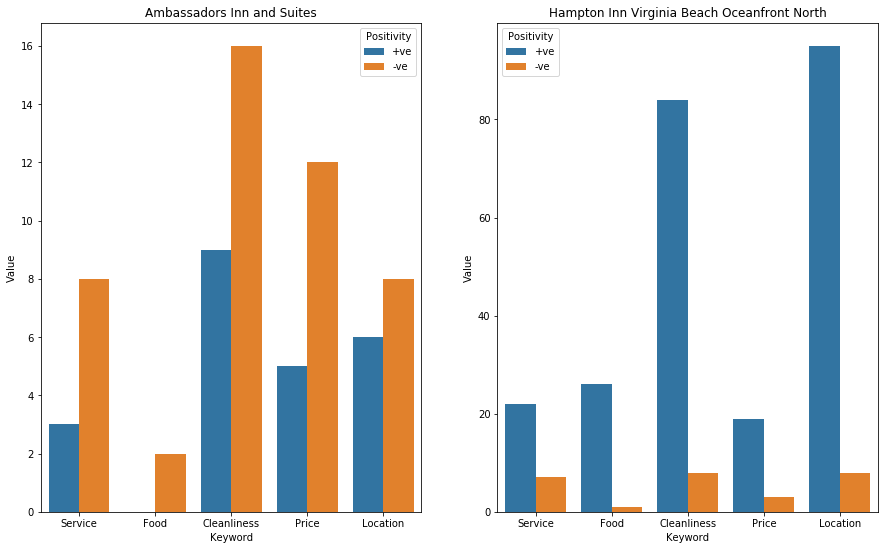

In [15]:
fig, ax =plt.subplots(1,2, figsize=(15,9))
sns.barplot(x = 'Keyword', y ='Value', hue='Positivity', data=dfH1,ax=ax[0]).set_title(H1)
sns.barplot(x = 'Keyword', y ='Value', hue='Positivity', data=dfH2,ax=ax[1]).set_title(H2)